In [1]:
from sklearn.datasets import load_wine
import pandas as pd
wine = load_wine()                                        #load_iris()是一個字典的資料
df = pd.DataFrame(wine["data"],                           #用pd的DataFrame表格功能把iris的data
                  columns=wine["feature_names"])          #---用feature_names的標題 以表格呈現出來

df["ans"] = wine["target"]                                #多增加一行ans 用iris的target這行增加
df.to_csv("wine.csv", encoding="utf-8", index=False)      #存成iris.csv檔名的csv 檔
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,ans
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [7]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'ans'],
      dtype='object')

In [2]:
from sklearn.model_selection import train_test_split
# train_test_split用來將資料分割[90% x, 10% x, 90% y, 10% y]
x_train, x_test, y_train, y_test = train_test_split(wine["data"],
                                                    wine["target"],
                                                    test_size=0.1)
#test_size=0.1的意思是，會把iris["data"]切割成9:1等份，iris["target"]也切成9:1等份

In [3]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2)
#引用函式決策樹 來做分類

In [4]:
clf.fit(x_train, y_train)
#fit 的意思是 讓電腦來學考古資料的(x_train訓練題目,y_train訓練答案)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [5]:
from sklearn.metrics import accuracy_score
pre = clf.predict(x_test)        #predict(測試題目)，把測試題目丟給電腦，電腦回傳做出來的答案
accuracy_score(pre, y_test)      #把電腦做出來的答案跟y_test真正的答案做比較

0.8888888888888888

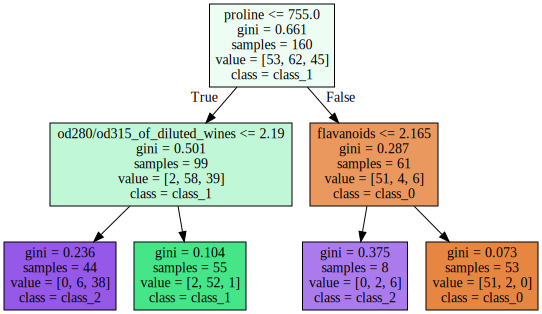

In [6]:
from sklearn.tree import export_graphviz  #把公式轉化成圖形
import graphviz
g = export_graphviz(clf,                                    #決策樹 
                    feature_names=wine["feature_names"],    #會標註出來用什麼標題區分
                    class_names=wine["target_names"],       #在底下標註是哪一品種的花
                    filled=True)                            #在較多的那項以顏色註記
graphviz.Source(g)                                          #把g丟進source並graphviz畫出來